In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt,sin,cos,atan2,radians

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df = df.drop(["Unnamed: 0","key"], axis = 1 )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [10]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df = df.dropna()

In [13]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [27]:
# Corrected function to calculate distance between two points
def distance_transform(la1, lo1, la2, lo2):
    radius = 6371.0  # Earth radius in kilometers

    # Convert degrees to radians
    la1, lo1, la2, lo2 = map(radians, [la1, lo1, la2, lo2])

    # Differences in latitude and longitude
    dlat = la2 - la1
    dlon = lo2 - lo1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(la1) * cos(la2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return radius * c  # Distance in kilometers

In [28]:
vectorized_distance = np.vectorize(distance_transform)

# Apply the vectorized function to the DataFrame columns
df['distance_km'] = vectorized_distance(
    df["pickup_latitude"].to_numpy(), 
    df["pickup_longitude"].to_numpy(), 
    df["dropoff_latitude"].to_numpy(), 
    df["dropoff_longitude"].to_numpy()
)

In [29]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [33]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [34]:
df["hour"] = df.pickup_datetime.dt.hour
df["day"] = df.pickup_datetime.dt.day
df["month"] = df.pickup_datetime.dt.month
df["year"] = df.pickup_datetime.dt.year
df["dayofweek"] = df.pickup_datetime.dt.dayofweek

In [35]:
df = df.drop("pickup_datetime",axis=1)

In [36]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3


In [43]:
def remove_outliers(df,column):
    q1 = df[column].quantile(0.25);
    q3 = df[column].quantile(0.75);
    iqr = q3-q1;

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_df = df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return filtered_df

In [44]:
df = remove_outliers(df,"fare_amount")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162278 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        162278 non-null  float64
 1   pickup_longitude   162278 non-null  float64
 2   pickup_latitude    162278 non-null  float64
 3   dropoff_longitude  162278 non-null  float64
 4   dropoff_latitude   162278 non-null  float64
 5   passenger_count    162278 non-null  int64  
 6   distance_km        162278 non-null  float64
 7   hour               162278 non-null  int32  
 8   day                162278 non-null  int32  
 9   month              162278 non-null  int32  
 10  year               162278 non-null  int32  
 11  dayofweek          162278 non-null  int32  
dtypes: float64(6), int32(5), int64(1)
memory usage: 13.0 MB


In [46]:
df = remove_outliers(df,"passenger_count")

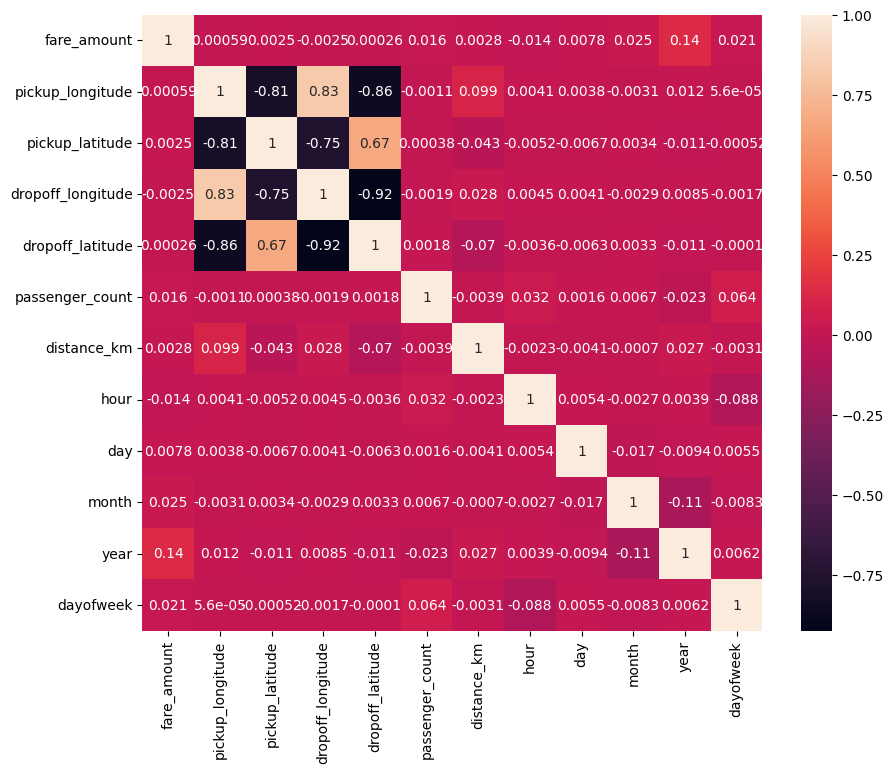

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0c3f88fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0c3f8b4100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0c3f88d090>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0c3f8b4640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0c3f8b48e0>],
 'means': []}

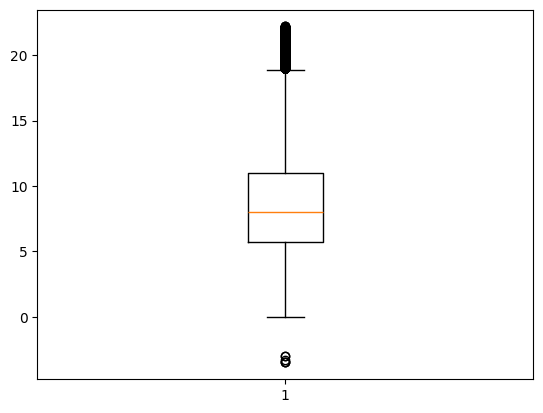

In [53]:
plt.boxplot(df["fare_amount"])

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
y = df["fare_amount"]
x = df.drop("fare_amount",axis=1)

In [56]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [58]:
linearmodel = LinearRegression()

In [59]:
linearmodel.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = linearmodel.predict(x_test)

In [64]:
r2 = r2_score(y_test,y_pred)

In [65]:
r2

0.020515615299457557

In [67]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [68]:
rmse

np.float64(4.111381801411311)

In [69]:
#randomforest

In [70]:
random = RandomForestRegressor()

In [71]:
random.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred = random.predict(x_test)

In [73]:
r2 = r2_score(y_test,y_pred)

In [74]:
r2

0.7536439391649299

In [75]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [76]:
rmse

np.float64(2.0619146126409325)